In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ticker = yf.Ticker("AAPL")
history = ticker.history(period="max")
latest_date = history.tail(1).index[0]
s_date = input("Enter the period in '%Y-%m-%d' format")

In [3]:
BTC_USD = yf.download("BTC-USD", start= s_date, end= latest_date, interval='1d')
BTC_USD.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Computing the Simple Moving Averages

In [12]:
# Compute a 9-day Simple Moving Average with pandas
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()
BTC_USD['SMA_300'] = BTC_USD['Close'].rolling(window = 300, min_periods = 1).mean()
BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30,SMA_300
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,457.334015,457.334015,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,440.887009,440.887009,440.887009
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,425.523336,425.523336,425.523336
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,421.368500,421.368500,421.368500
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,416.859003,416.859003,416.859003


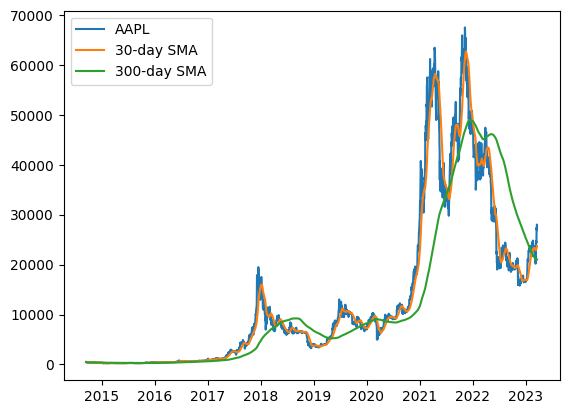

In [13]:
plt.plot(BTC_USD.index, BTC_USD['Close'], label='AAPL')
plt.plot(BTC_USD['SMA_30'].index, BTC_USD['SMA_30'] , label='30-day SMA')
plt.plot(BTC_USD['SMA_300'].index, BTC_USD['SMA_300'] , label='300-day SMA')
plt.legend()
plt.show()